# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [2]:
X_train = pd.read_csv('./txt/X_train.csv', index_col=0)
y_train = pd.read_csv('./txt/y_train.csv',index_col=0)
X_test = pd.read_csv('./txt/X_test.csv', index_col=0)
y_test = pd.read_csv('./txt/y_test.csv',index_col=0)

print(X_train.head(5))
print(y_train.head(5))
print(X_test.head(5))
print(y_test.head(5))

   subject  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0        1           0.288585          -0.020294          -0.132905   
1        1           0.278419          -0.016411          -0.123520   
2        1           0.279653          -0.019467          -0.113462   
3        1           0.279174          -0.026201          -0.123283   
4        1           0.276629          -0.016570          -0.115362   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.995279         -0.983111         -0.913526         -0.995112   
1         -0.998245         -0.975300         -0.960322         -0.998807   
2         -0.995380         -0.967187         -0.978944         -0.996520   
3         -0.996091         -0.983403         -0.990675         -0.997099   
4         -0.998139         -0.980817         -0.990482         -0.998321   

   tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  ...  fBodyBodyGyroJerkMag-meanFreq()  \
0         -0.983185         -0.

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [3]:
from sklearn.model_selection import train_test_split

# Extrair 25% da base de treino como base de validação
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=0.75, random_state=42)

# Verificando as novas dimensões das bases
print(f"Tamanho da nova base de treinamento: {X_train.shape[0]}")
print(f"Tamanho da nova base de validação: {X_val.shape[0]}")

Tamanho da nova base de treinamento: 5514
Tamanho da nova base de validação: 1838


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [4]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Treinando o classificador
clf.fit(X_train, y_train.values.ravel())  # Usar ravel() para converter y_train para 1D se necessário

# Obtendo a importância das variáveis
importances = clf.feature_importances_

# Criando um DataFrame para visualizar as importâncias
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Ordenando o DataFrame por importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Obtendo as 3 variáveis mais importantes
top_3_features = feature_importance_df.head(3)

print("As 3 variáveis mais importantes são:")
print(top_3_features)

As 3 variáveis mais importantes são:
                  Feature  Importance
53    tGravityAcc-min()-X    0.279312
272      fBodyAcc-mad()-X    0.252631
560  angle(Y,gravityMean)    0.166625


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

O melhor ccp_alpha é: 0.0000 com uma acurácia de: 0.8934


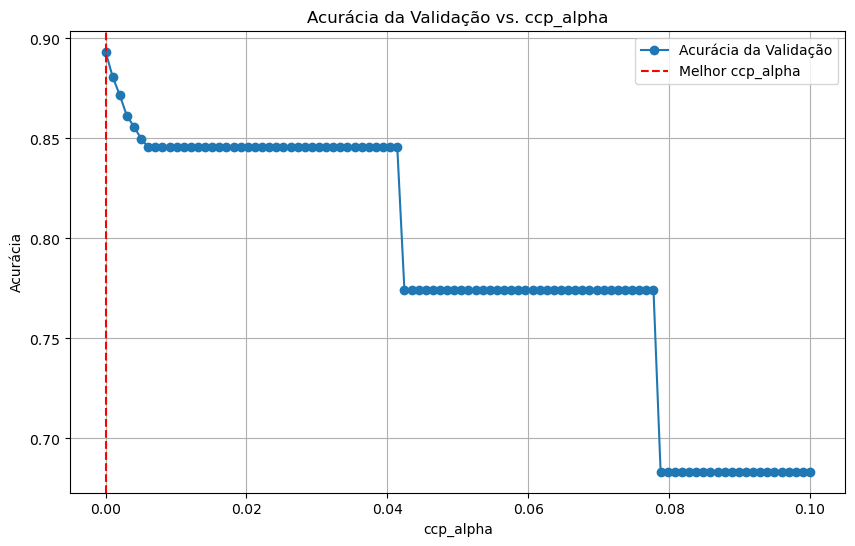

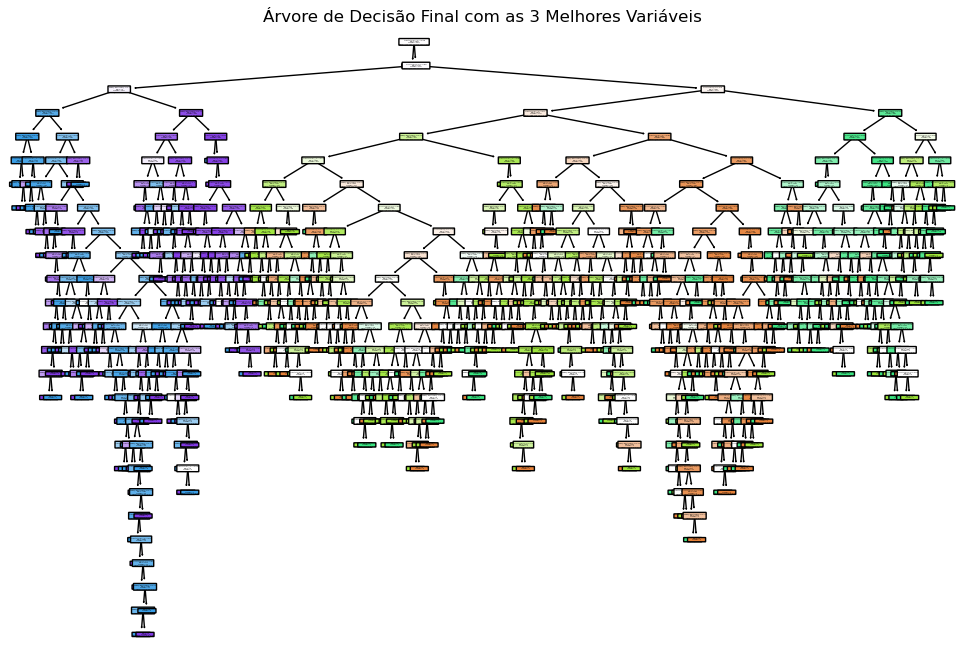

CPU times: total: 36.7 s
Wall time: 36.7 s


In [5]:
%%time

top_3_columns = top_3_features['Feature'].tolist()
X_train_top3 = X_train[top_3_columns]
X_val_top3 = X_val[top_3_columns]

# Inicializando o array para armazenar os resultados
alphas = np.linspace(0, 0.1, 100)  # Valores de ccp_alpha a serem testados
scores = []

# Treinando a árvore com diferentes valores de ccp_alpha
for alpha in alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    clf.fit(X_train_top3, y_train.values.ravel())  # Treinamento com as 3 variáveis
    y_val_pred = clf.predict(X_val_top3)  # Previsões na base de validação
    score = accuracy_score(y_val, y_val_pred)  # Acurácia na base de validação
    scores.append(score)

# Encontrando o melhor ccp_alpha
best_alpha_index = np.argmax(scores)
best_alpha = alphas[best_alpha_index]
best_score = scores[best_alpha_index]

print(f"O melhor ccp_alpha é: {best_alpha:.4f} com uma acurácia de: {best_score:.4f}")

# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.plot(alphas, scores, label='Acurácia da Validação', marker='o')
plt.axvline(x=best_alpha, color='r', linestyle='--', label='Melhor ccp_alpha')
plt.title('Acurácia da Validação vs. ccp_alpha')
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.legend()
plt.grid()
plt.show()

# Treinando a árvore com o melhor ccp_alpha
final_clf = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
final_clf.fit(X_train_top3, y_train.values.ravel())

# Plotando a árvore final
plt.figure(figsize=(12, 8))
plot_tree(final_clf, feature_names=top_3_columns, filled=True, rounded=True)
plt.title('Árvore de Decisão Final com as 3 Melhores Variáveis')
plt.show()

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia na base de testes: 0.7129
Matriz de Confusão:
[[245 140 111   0   0   0]
 [117 297  57   0   0   0]
 [ 70  87 263   0   0   0]
 [  0   0   0 342 149   0]
 [  0   0   0 115 417   0]
 [  0   0   0   0   0 537]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.57      0.49      0.53       496
           2       0.57      0.63      0.60       471
           3       0.61      0.63      0.62       420
           4       0.75      0.70      0.72       491
           5       0.74      0.78      0.76       532
           6       1.00      1.00      1.00       537

    accuracy                           0.71      2947
   macro avg       0.70      0.71      0.70      2947
weighted avg       0.71      0.71      0.71      2947



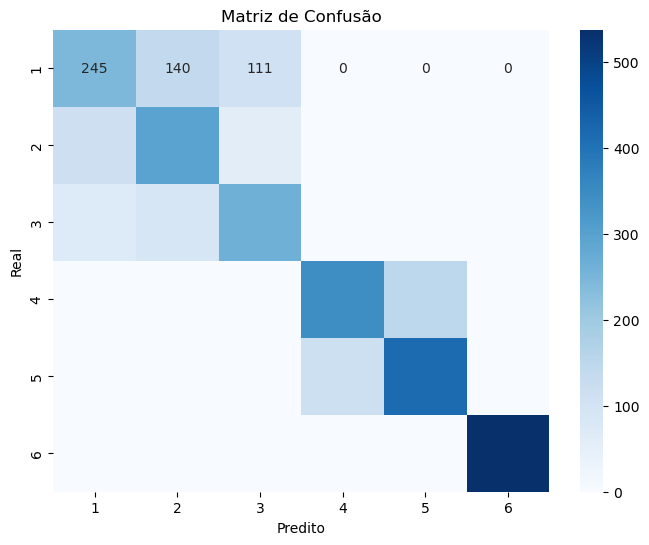

In [6]:
from sklearn.metrics import confusion_matrix, classification_report

# Fazendo previsões na base de testes
y_test_pred = final_clf.predict(X_test[top_3_columns])  # Previsões usando as 3 variáveis mais importantes

# Calculando a acurácia
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Acurácia na base de testes: {test_accuracy:.4f}")

# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)
print("Matriz de Confusão:")
print(cm)

# Gerando o relatório de classificação
report = classification_report(y_test, y_test_pred)
print("Relatório de Classificação:")
print(report)

# Opcional: Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


**Interpretação das Métricas**:

1. Precisão: Medida de quão preciso foi o modelo em suas previsões. Por exemplo, a precisão da classe 4 foi de 0.75, indicando que 75% das previsões feitas para esta classe estavam corretas.
2. Recall: Medida da capacidade do modelo de capturar as instâncias relevantes de cada classe. O recall para a classe 5 foi de 0.78, significando que 78% das instâncias reais dessa classe foram corretamente identificadas.
3. F1-score: A média harmônica da precisão e do recall, fornecendo uma visão balanceada. O F1-score da classe 6 foi perfeito (1.00), mostrando um desempenho excelente nessa classe.

**Conclusão:**

O modelo de árvore de decisão apresentou uma acurácia razoável de 71,29% na base de testes. Embora o desempenho variou entre as classes, o modelo foi capaz de classificar com sucesso as atividades humanas, especialmente na classe 6, que teve um desempenho ideal. No entanto, as classes 1 e 2 mostraram desafios em termos de precisão e recall, sugerindo áreas para melhorias potenciais.